In [1]:
!python ../../Part-Aware-Transformer/train.py --config_file "UAM_containers_all.yml"

2025-05-10 15:44:43,629 PAT INFO: Saving model in the path :/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/Lab_PC/LogsContainers/UAM
2025-05-10 15:44:43,629 PAT INFO: Namespace(config_file='UAM_containers_all.yml', opts=[], local_rank=0)
2025-05-10 15:44:43,629 PAT INFO: Loaded configuration file UAM_containers_all.yml
2025-05-10 15:44:43,629 PAT INFO: 
MODEL:
  PRETRAIN_CHOICE: 'imagenet'
  #PRETRAIN_PATH: "../../.cache/torch/hub/checkpoints" # root of pretrain path
  #PRETRAIN_PATH: "./" #test 
  PRETRAIN_PATH: "/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/"
  IF_LABELSMOOTH: 'on'
  IF_WITH_CENTER: 'no'
  NAME: 'part_attention_vit'
  NO_MARGIN: True
  DEVICE_ID: ('0')
  TRANSFORMER_TYPE: 'vit_base_patch16_224_TransReID'
  STRIDE_SIZE: [16, 16]

INPUT:
  SIZE_TRAIN: [256,128]
  SIZE_TEST: [256,128]
  REA:
    ENABLED: False
  PIXEL_MEAN: [0.5, 0.5, 0.5]
  PIXEL_STD: [0.5, 0.5, 0.5]
  LGT: # Local Grayscale Transfomation
    DO_LGT: True
    PROB: 0.5

DATAS

In [2]:
!python ../../Part-Aware-Transformer/update.py --config_file "UAM_containers_test_all.yml" --track="/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/Results/track_all_containers.txt"

2025-05-10 16:05:52,027 PAT INFO: Namespace(config_file='UAM_containers_test_all.yml', opts=[], track='/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/Results/track_all containers.txt')
2025-05-10 16:05:52,027 PAT INFO: Loaded configuration file UAM_containers_test_all.yml
2025-05-10 16:05:52,027 PAT INFO: 
MODEL:
  PRETRAIN_CHOICE: 'imagenet'
  #PRETRAIN_PATH: "../../.cache/torch/hub/checkpoints" # root of pretrain path
  #PRETRAIN_PATH: "./" # 
  PRETRAIN_PATH: "/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/"
  METRIC_LOSS_TYPE: 'triplet'
  IF_LABELSMOOTH: 'on'
  IF_WITH_CENTER: 'no'
  NAME: 'part_attention_vit'
  NO_MARGIN: True
  DEVICE_ID: ('0')
  TRANSFORMER_TYPE: 'vit_base_patch16_224_TransReID'
  STRIDE_SIZE: [16, 16]

INPUT:
  SIZE_TRAIN: [256,128]
  SIZE_TEST: [256,128]
  REA:
    ENABLED: False
  PIXEL_MEAN: [0.5, 0.5, 0.5]
  PIXEL_STD: [0.5, 0.5, 0.5]
  LGT: # Local Grayscale Transfomation
    DO_LGT: True
    PROB: 0.5

DATASETS:
  TRAIN: ('UAM',)

## Run with flip for inference
track file should be renamed to no erase baseline

In [3]:
!python ../../Part-Aware-Transformer/update_flip.py --config_file "UAM_containers_test_all.yml" --track="/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/Results/track_flip_all_containers.txt"

2025-05-10 16:06:41,035 PAT INFO: Namespace(config_file='UAM_containers_test_all.yml', opts=[], track='/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/Results/track_flip_all_containers.txt')
2025-05-10 16:06:41,035 PAT INFO: Loaded configuration file UAM_containers_test_all.yml
2025-05-10 16:06:41,035 PAT INFO: 
MODEL:
  PRETRAIN_CHOICE: 'imagenet'
  #PRETRAIN_PATH: "../../.cache/torch/hub/checkpoints" # root of pretrain path
  #PRETRAIN_PATH: "./" # 
  PRETRAIN_PATH: "/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/"
  METRIC_LOSS_TYPE: 'triplet'
  IF_LABELSMOOTH: 'on'
  IF_WITH_CENTER: 'no'
  NAME: 'part_attention_vit'
  NO_MARGIN: True
  DEVICE_ID: ('0')
  TRANSFORMER_TYPE: 'vit_base_patch16_224_TransReID'
  STRIDE_SIZE: [16, 16]

INPUT:
  SIZE_TRAIN: [256,128]
  SIZE_TEST: [256,128]
  REA:
    ENABLED: False
  PIXEL_MEAN: [0.5, 0.5, 0.5]
  PIXEL_STD: [0.5, 0.5, 0.5]
  LGT: # Local Grayscale Transfomation
    DO_LGT: True
    PROB: 0.5

DATASETS:
  TRAIN: ('U

### Compare outputs
1st normal updated vs. 2nd inference with flipped too

In [6]:
import sys
sys.path.append('/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/UrbAM-ReID/Code/')
from Evaluate_UrbAM_ReID_fn import evaluate_reid

In [10]:
mAP_base, CMC_base = evaluate_reid(
    track_file="/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/Results/track_all_containers.txt",
    data_path="/media/DiscoLocal/IPCV/Carolina/UrbAM-ReID_classes/Containers/"
)

In [12]:
print(mAP_base)
print(CMC_base)

0.5430598151034701
[0.58241758 0.65934066 0.7032967  0.71428571 0.72527473 0.76923077
 0.76923077 0.8021978  0.81318681 0.81318681 0.83516484 0.84615385
 0.84615385 0.84615385 0.85714286 0.85714286 0.87912088 0.89010989
 0.89010989 0.89010989 0.89010989 0.89010989 0.89010989 0.91208791
 0.91208791 0.91208791 0.92307692 0.94505495 0.94505495 0.95604396
 0.95604396 0.96703297 0.96703297 0.96703297 0.96703297 0.96703297
 0.96703297 0.96703297 0.96703297 0.96703297 0.96703297 0.96703297
 0.96703297 0.96703297 0.96703297 0.96703297 0.96703297 0.96703297
 0.96703297 0.96703297 0.96703297 0.96703297 0.96703297 0.96703297
 0.97802198 0.97802198 0.97802198 0.97802198 0.97802198 0.97802198
 0.97802198 0.97802198 0.97802198 0.97802198 0.97802198 0.97802198
 0.97802198 0.98901099 0.98901099 0.98901099 0.98901099 0.98901099
 0.98901099 0.98901099 0.98901099 0.98901099 0.98901099 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.


In [11]:
mAP_flip, CMC_flip = evaluate_reid(
    track_file="/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/Results/track_flip_all_containers.txt",
    data_path="/media/DiscoLocal/IPCV/Carolina/UrbAM-ReID_classes/Containers/"
)

In [13]:
print(mAP_flip)
print(CMC_flip)

0.5552486228203557
[0.49450549 0.58241758 0.65934066 0.69230769 0.73626374 0.76923077
 0.76923077 0.79120879 0.8021978  0.82417582 0.82417582 0.83516484
 0.83516484 0.83516484 0.84615385 0.87912088 0.89010989 0.9010989
 0.9010989  0.9010989  0.91208791 0.91208791 0.92307692 0.92307692
 0.92307692 0.92307692 0.93406593 0.94505495 0.94505495 0.95604396
 0.96703297 0.96703297 0.96703297 0.96703297 0.96703297 0.96703297
 0.96703297 0.96703297 0.96703297 0.96703297 0.96703297 0.96703297
 0.96703297 0.96703297 0.96703297 0.96703297 0.96703297 0.96703297
 0.96703297 0.96703297 0.96703297 0.96703297 0.96703297 0.96703297
 0.96703297 0.96703297 0.96703297 0.96703297 0.96703297 0.97802198
 0.97802198 0.97802198 0.97802198 0.97802198 0.97802198 0.97802198
 0.97802198 0.97802198 0.97802198 0.97802198 0.97802198 0.97802198
 0.97802198 0.97802198 0.97802198 0.97802198 0.98901099 0.98901099
 0.98901099 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.     

In [17]:
print(len(CMC_base))
print(len(CMC_flip))

91
91


In [10]:
import matplotlib.pyplot as plt
import numpy as np

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91]


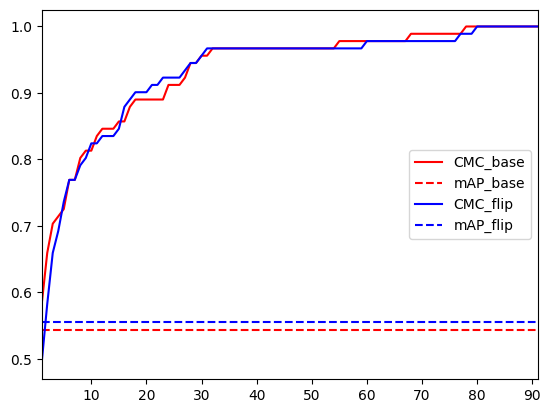

In [27]:
fig = plt.figure()
ax = fig.add_subplot()

x = [i+1 for i in range(len(CMC_base))]
print(x)

ax.plot(x, CMC_base, 'r', label='CMC_base')
ax.plot(x, np.full_like(CMC_base, mAP_base), 'r--', label='mAP_base')
ax.plot(x, CMC_flip, 'b', label='CMC_flip')
ax.plot(x, np.full_like(CMC_flip, mAP_flip), 'b--', label='mAP_flip')

ax.set_xlim(1,len(CMC_base))
ax.legend()

plt.show()

## Run with flip for training and inference

In [1]:
!python ../../Part-Aware-Transformer/train_flip.py --config_file "UAM_containers_all_flip2.yml"

2025-05-12 21:06:44,798 PAT INFO: Saving model in the path :/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/Lab_PC/LogsContainersFlip2/UAM
2025-05-12 21:06:44,799 PAT INFO: Namespace(config_file='UAM_containers_all_flip2.yml', opts=[], local_rank=0)
2025-05-12 21:06:44,799 PAT INFO: Loaded configuration file UAM_containers_all_flip2.yml
2025-05-12 21:06:44,799 PAT INFO: 
MODEL:
  PRETRAIN_CHOICE: 'imagenet'
  #PRETRAIN_PATH: "../../.cache/torch/hub/checkpoints" # root of pretrain path
  #PRETRAIN_PATH: "./" #test 
  PRETRAIN_PATH: "/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/"
  IF_LABELSMOOTH: 'on'
  IF_WITH_CENTER: 'no'
  NAME: 'part_attention_vit'
  NO_MARGIN: True
  DEVICE_ID: ('0')
  TRANSFORMER_TYPE: 'vit_base_patch16_224_TransReID'
  STRIDE_SIZE: [16, 16]

INPUT:
  SIZE_TRAIN: [256,128]
  SIZE_TEST: [256,128]
  REA:
    ENABLED: False
  PIXEL_MEAN: [0.5, 0.5, 0.5]
  PIXEL_STD: [0.5, 0.5, 0.5]
  LGT: # Local Grayscale Transfomation
    DO_LGT: True
   

### Training with flip and testing without

In [2]:
!python ../../Part-Aware-Transformer/update.py --config_file "UAM_containers_test_all_flip2.yml" --track="/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/Results/track_all_containers_flip1.txt"

2025-05-12 21:47:06,616 PAT INFO: Namespace(config_file='UAM_containers_test_all_flip2.yml', opts=[], track='/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/Results/track_all_containers_flip1.txt')
2025-05-12 21:47:06,616 PAT INFO: Loaded configuration file UAM_containers_test_all_flip2.yml
2025-05-12 21:47:06,617 PAT INFO: 
MODEL:
  PRETRAIN_CHOICE: 'imagenet'
  #PRETRAIN_PATH: "../../.cache/torch/hub/checkpoints" # root of pretrain path
  #PRETRAIN_PATH: "./" # 
  PRETRAIN_PATH: "/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/"
  METRIC_LOSS_TYPE: 'triplet'
  IF_LABELSMOOTH: 'on'
  IF_WITH_CENTER: 'no'
  NAME: 'part_attention_vit'
  NO_MARGIN: True
  DEVICE_ID: ('0')
  TRANSFORMER_TYPE: 'vit_base_patch16_224_TransReID'
  STRIDE_SIZE: [16, 16]

INPUT:
  SIZE_TRAIN: [256,128]
  SIZE_TEST: [256,128]
  REA:
    ENABLED: False
  PIXEL_MEAN: [0.5, 0.5, 0.5]
  PIXEL_STD: [0.5, 0.5, 0.5]
  LGT: # Local Grayscale Transfomation
    DO_LGT: True
    PROB: 0.5

DATASETS:

### Training with flip and testing with flip

In [5]:
!python ../../Part-Aware-Transformer/update_flip.py --config_file "UAM_containers_test_all_flip2.yml" --track="/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/Results/track_flip_all_containers_flip2.txt"

2025-05-12 23:01:36,052 PAT INFO: Namespace(config_file='UAM_containers_test_all_flip2.yml', opts=[], track='/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/Results/track_flip_all_containers_flip2.txt')
2025-05-12 23:01:36,052 PAT INFO: Loaded configuration file UAM_containers_test_all_flip2.yml
2025-05-12 23:01:36,052 PAT INFO: 
MODEL:
  PRETRAIN_CHOICE: 'imagenet'
  #PRETRAIN_PATH: "../../.cache/torch/hub/checkpoints" # root of pretrain path
  #PRETRAIN_PATH: "./" # 
  PRETRAIN_PATH: "/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/"
  METRIC_LOSS_TYPE: 'triplet'
  IF_LABELSMOOTH: 'on'
  IF_WITH_CENTER: 'no'
  NAME: 'part_attention_vit'
  NO_MARGIN: True
  DEVICE_ID: ('0')
  TRANSFORMER_TYPE: 'vit_base_patch16_224_TransReID'
  STRIDE_SIZE: [16, 16]

INPUT:
  SIZE_TRAIN: [256,128]
  SIZE_TEST: [256,128]
  REA:
    ENABLED: False
  PIXEL_MEAN: [0.5, 0.5, 0.5]
  PIXEL_STD: [0.5, 0.5, 0.5]
  LGT: # Local Grayscale Transfomation
    DO_LGT: True
    PROB: 0.5

DATA

### Comparing results

In [7]:
mAP_flip1, CMC_flip1 = evaluate_reid(
    track_file="/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/Results/track_all_containers_flip1.txt",
    data_path="/media/DiscoLocal/IPCV/Carolina/UrbAM-ReID_classes/Containers/"
)

In [8]:
mAP_flip2, CMC_flip2 = evaluate_reid(
    track_file="/media/DiscoLocal/IPCV/Carolina/UrbanElementsREID/Challenge/Results/track_flip_all_containers_flip2.txt",
    data_path="/media/DiscoLocal/IPCV/Carolina/UrbAM-ReID_classes/Containers/"
)

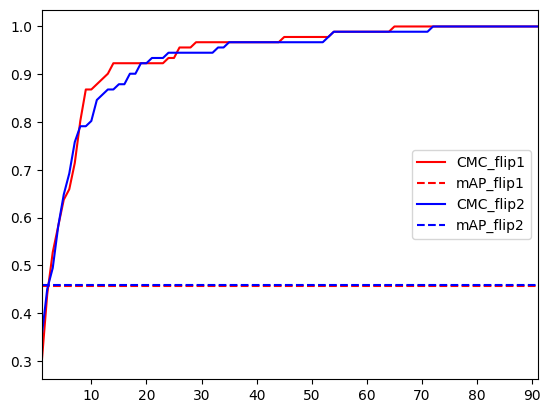

In [11]:
fig = plt.figure()
ax = fig.add_subplot()

x = [i+1 for i in range(len(CMC_flip1))]

ax.plot(x, CMC_flip1, 'r', label='CMC_flip1')
ax.plot(x, np.full_like(CMC_flip1, mAP_flip1), 'r--', label='mAP_flip1')
ax.plot(x, CMC_flip2, 'b', label='CMC_flip2')
ax.plot(x, np.full_like(CMC_flip2, mAP_flip2), 'b--', label='mAP_flip2')

ax.set_xlim(1,len(CMC_flip1))
ax.legend()

plt.show()